In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [64]:
# Load the dataset from the kaggle 'https://www.kaggle.com/datasets/bidemiayinde/thyroid-sickness-determination?resource=download'
df = pd.read_csv("dataset_thyroid_sick (1).csv") 
print(df.head())

  age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ... TT4_measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U_measured   T4U FTI_measured  FTI TBG_measured

In [65]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [88]:
# Define numerical and categorical columns
numerical_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                    'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
                    'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                    'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured',
                    'TBG_measured', 'referral_source', 'Class']

In [89]:
print(numerical_cols)

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


In [68]:
# Detect outliers using IQR
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

# Replace outliers with NaN
df[numerical_cols] = df[numerical_cols].where(~outliers, np.nan)


In [69]:
# Preprocess numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Preprocess categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
data_preprocessed = preprocessor.fit_transform(df)

# Split the dataset into training (75%) and testing (25%) subsets
X = data_preprocessed
y = df['Class']  # Assuming 'Class' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

# EDA

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

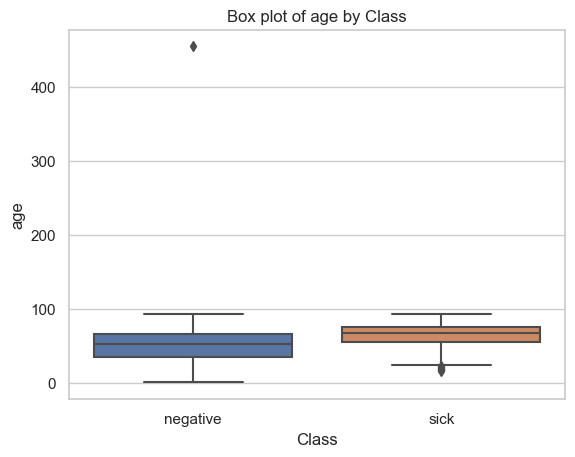

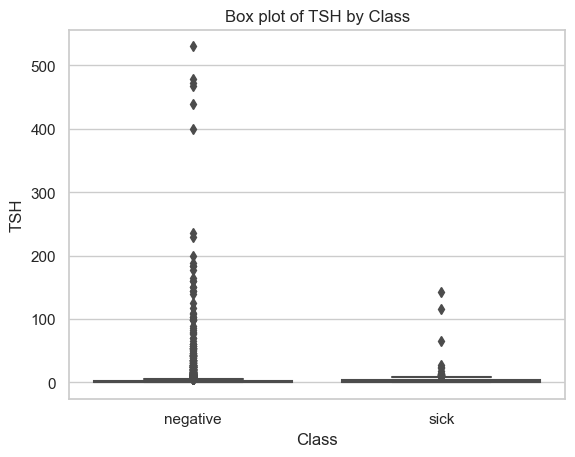

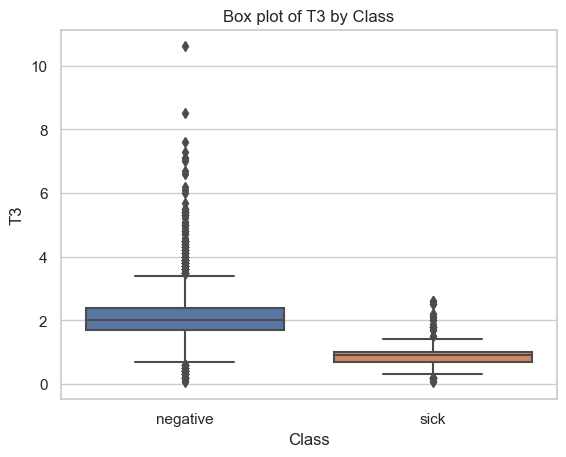

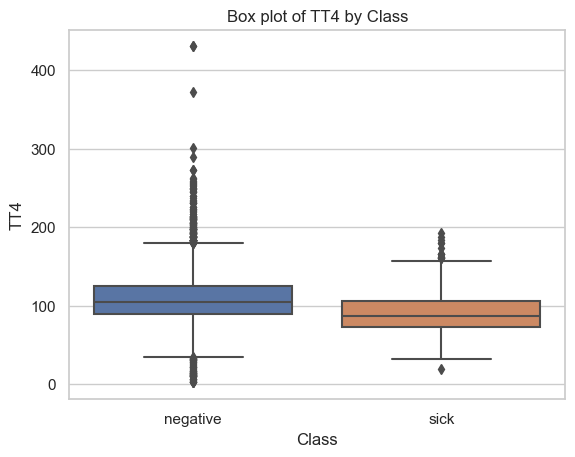

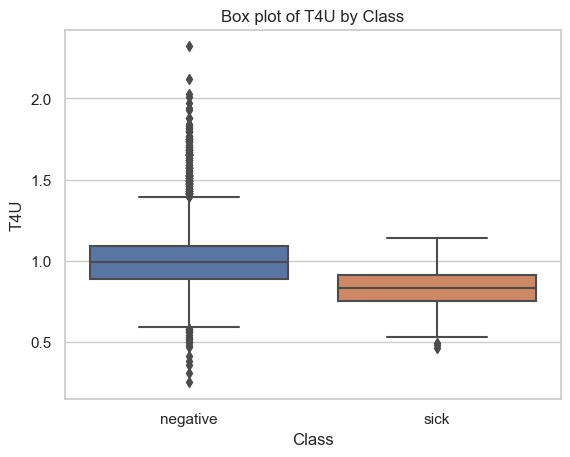

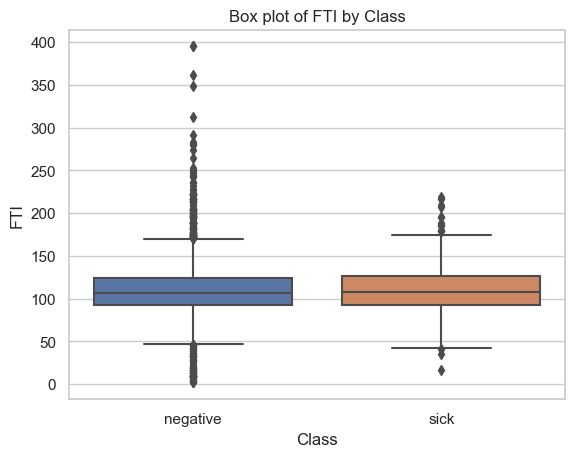

In [96]:
# Box plot
for col in numerical_cols:
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Box plot of {col} by Class')
    plt.show()

In [92]:
print(df[numerical_cols + ['Class']].dtypes)

age      object
TSH      object
T3       object
TT4      object
T4U      object
FTI      object
Class    object
dtype: object


In [93]:
# Convert specified columns to numeric
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Check the data types again
print(df[numerical_cols + ['Class']].dtypes)

age      float64
TSH      float64
T3       float64
TT4      float64
T4U      float64
FTI      float64
Class     object
dtype: object


/Users/sriharshasankabathula/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


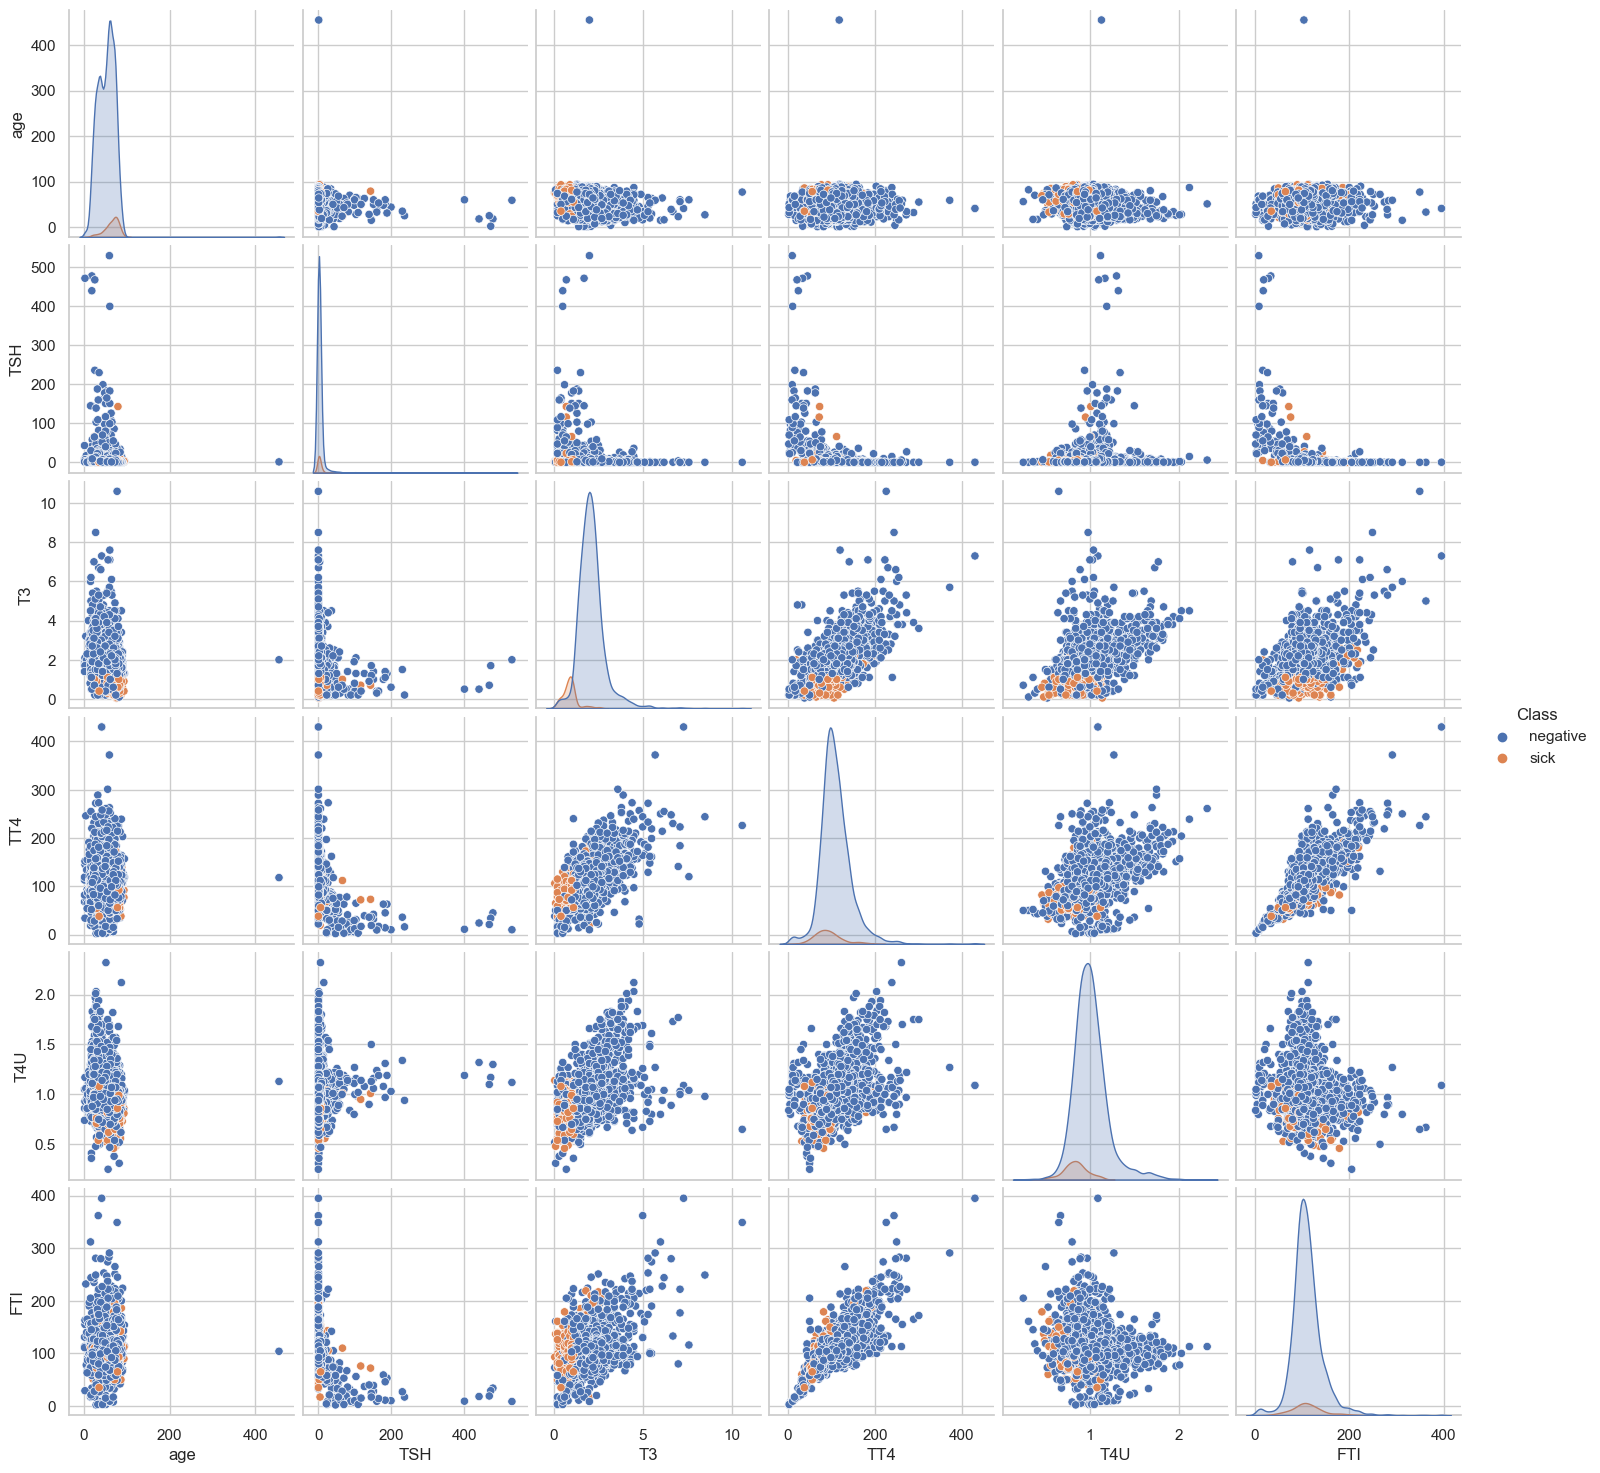

In [94]:
# Scatter plot
sns.pairplot(df[numerical_cols + ['Class']], hue='Class', diag_kind='kde')
plt.show()

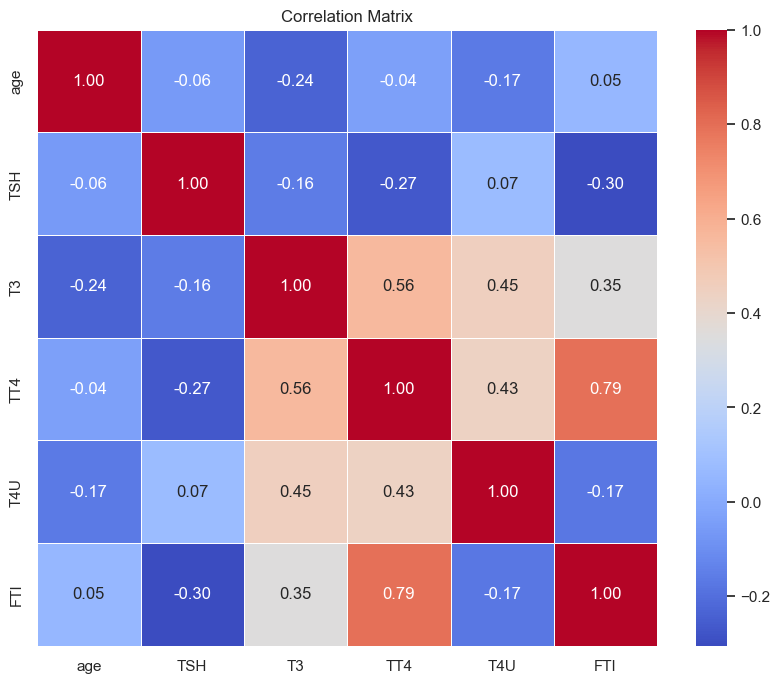

In [95]:
# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Comparative Analysis:

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report


In [100]:
# Convert the target variable to binary
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Split the dataset into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [103]:
results = {}
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=10000),
    'SVM': SVC(random_state=42, probability=True)
}

for model_name, model in models.items():
    # Bundle preprocessing and modeling code in a pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc
    }
    
    print(f"Evaluation metrics for {model_name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

# Display results
results_df = pd.DataFrame(results)
print("Comparative Analysis Results:")
print(results_df)

Evaluation metrics for DecisionTree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       697
           1       0.91      0.87      0.89        46

    accuracy                           0.99       743
   macro avg       0.95      0.93      0.94       743
weighted avg       0.99      0.99      0.99       743

------------------------------------------------------------
Evaluation metrics for LogisticRegression:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       697
           1       0.70      0.67      0.69        46

    accuracy                           0.96       743
   macro avg       0.84      0.83      0.83       743
weighted avg       0.96      0.96      0.96       743

------------------------------------------------------------
Evaluation metrics for SVM:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       697
       

In [105]:
#Updating the preprocessing step
# Preprocess categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols[:-1])  # Exclude 'Class' from categorical columns
    ])

# Apply preprocessing
data_preprocessed = preprocessor.fit_transform(df)

# Split the dataset into training (75%) and testing (25%) subsets
X = data_preprocessed
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


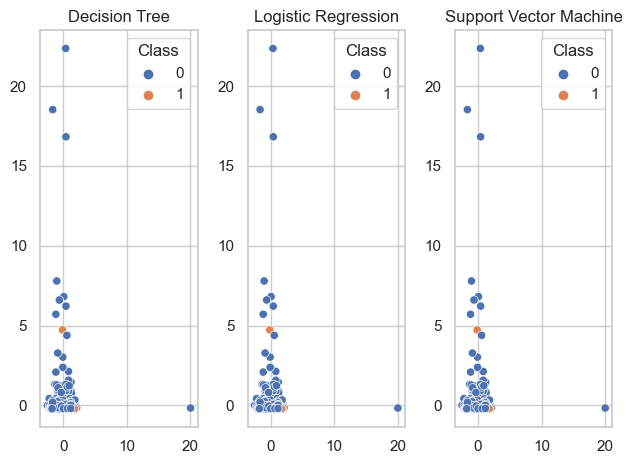

In [110]:
# Decision Tree
plt.subplot(1, 3, 1)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
ax = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test)
xlim = plt.xlim()
ylim = plt.ylim()
plt.title("Decision Tree")

# Logistic Regression
plt.subplot(1, 3, 2)
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
ax = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test)
plt.xlim(xlim)
plt.ylim(ylim)
plt.title("Logistic Regression")

# Support Vector Machine
plt.subplot(1, 3, 3)
clf_svm = SVC(probability=True, random_state=42)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
ax = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test)
plt.xlim(xlim)
plt.ylim(ylim)
plt.title("Support Vector Machine")

plt.tight_layout()
plt.show()


# Conclusion

Reasons for taking the the models such as Decisiontree,SVM, logistic Regression:
1.Combining the logistic regression, decision tree, and SVM could help in finding the best model for the prediction of the dependent variables and the relationships within the data. However, model complexity, performance, and interpretability are underlain by the hyperparameters and the type of kernel. So, this answers why each of the models presented was assessed in their performance and why, to be able to discuss which models might be best suited for the current project, their performance was assessed through different metrics, such as accuracy, precision, recall, f1-score, and AUC.
2.In addition of that,Logistic regression is one of the simplest linear models, relatively easy for interpretation, and, therefore, it may be regarded as an appropriate tool for making the first attempts in classification tasks. It is less computationally intensive and hence trains and evaluates models at a faster pace. Decision trees allow the capturing of non-linear relationships between dependent and independent variables while providing feature importance information. Very intuitive and visual, might even help with insights. Support Vector Machines (SVMs) are suitable for the feature space of very high dimensions. They tackle linear and non-linear classification tasks.

Model performance:
Decision Tree was among all of the algorithms with the best performance, scoring the highest in accuracy (98.65%) and AUC (93.19%). It also provided a high F1-score (88.89%), compared to SVM, but a little lower value in recall (86.96%).
Compared with both models, Logistic Regression showed the minimum recall of 67.39% and a relatively low F1-score of 68.89%, which may suggest a problem in the identification with respect to the positive class.
SVM is a good choice for the classification problem, since it came up with a good and balanced result among the competitive F1-score (75.61%), high accuracy (97.31%), and AUC (96.80%).

Suggestions:
Model selection: The overall performance of the Decision Tree model is generally very good, and probably this is good enough to recommend it as a main model. However, the final choice should be based on a number of factors, particularly the specific needs and trade-offs of a situation, such as interpretability versus performance.
Hyperparameter Tuning: Further tuning the hyperparameters of the SVM model could bring better overall performance, particularly concerning recall and F1 score. GridSearch and RandomSearch are the methods that could apply for hyperparameter optimization.
If necessary, the feature importance would then be analyzed so that the importance of each feature to the target variable would be ascertained. Focusing efforts on those important components could bring improvement in the performance of the model.

Limitations and Assumptions:
1.Imputation Technique: When using this method of imputation (most common for categorical data), it may involve using the mean for numerical data, which, in the scope of incomplete information, is one of the most sound ones. Several possible alternative imputation strategies might be assessed while taking domain knowledge into account.
2.Handling the Outliers: In the IQR technique, the outliers detected were replaced by NaN. This technique works fine, though it may skip important data points and may not capture all the outliers. It should verify if the next methods of robust scaler or z-score could be alternative techniques.
Where such a relationship is not realized, logistic regression assumes a linear relationship between the independent and dependent variables; thus, it makes poor prediction because the relationship may not be captured well.
